# Pandas Time Series Analysis Part 2: date_range
## Inspired by Dhruv Patel's Code Basics YouTube Channel

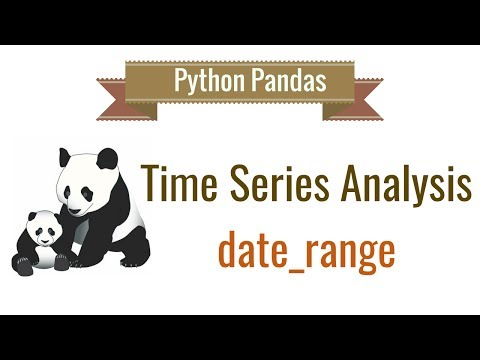

In [8]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('A9c7hGXQ5A8')

## Processing a Time Series Data Set without date column

In [2]:
import pandas as pd 

In [13]:
aapl_stock_price_df = pd.read_csv('AAPL_Stock_Price_Without_Dates.csv')

In [14]:
aapl_stock_price_df

,Open,High,Low,Close,Adj Close,Volume
0,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
1,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
3,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
4,174.350006,175.610001,173.929993,174.350006,169.228500,20567800
5,174.550003,175.059998,173.410004,174.330002,169.209091,21584000
6,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
7,174.589996,175.490005,174.490005,175.279999,170.131180,18667700


### Creating a date range using Pandas date_range function

In [11]:
dt_rng = pd.date_range(start='2018-01-02',end='2018-01-11', freq='B') ## B -> Business Days

In [12]:
dt_rng

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11'],
              dtype='datetime64[ns]', freq='B')

### Using the date range dt_rng as the index of the data frame

In [15]:
aapl_stock_price_df.set_index(dt_rng,inplace=True)

In [16]:
aapl_stock_price_df

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800
2018-01-09,174.550003,175.059998,173.410004,174.330002,169.209091,21584000
2018-01-10,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-11,174.589996,175.490005,174.490005,175.279999,170.131180,18667700


- Drawing a chart of closing stock price

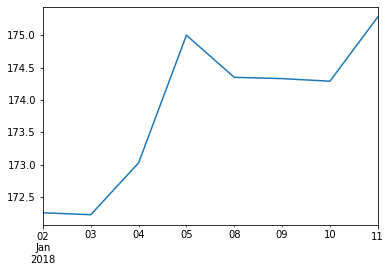

In [18]:
%matplotlib inline 
aapl_stock_price_df['Close'].plot() 

- Partial days selection

In [19]:
aapl_stock_price_df['2018-01-02':'2018-01-05'] 

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000


- Average of closing price between 2018-01-02 and 2018-01-05

In [20]:
aapl_stock_price_df.loc['2018-01-02':'2018-01-05','Close'].mean() 

173.1299975

In [21]:
aapl_stock_price_df

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800
2018-01-09,174.550003,175.059998,173.410004,174.330002,169.209091,21584000
2018-01-10,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-11,174.589996,175.490005,174.490005,175.279999,170.131180,18667700


### We see that the stock prices are missing on the weekends as stocks are not traded on weekend. If for some reason we want the stock prices on the weekends as the stock price of the last traded day we can use the method asfreq of Pandas

In [25]:
aapl_stock_price_df.asfreq('D', method = 'pad')   # 5th and 6th Jan were weekend

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-06,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-07,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800
2018-01-09,174.550003,175.059998,173.410004,174.330002,169.209091,21584000
2018-01-10,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-11,174.589996,175.490005,174.490005,175.279999,170.131180,18667700


- To see only the weekly prices

In [26]:
aapl_stock_price_df.asfreq('W', method = 'pad')

,Open,High,Low,Close,Adj Close,Volume
2018-01-07,173.440002,175.369995,173.050003,175.0,169.859406,23660000


- To see only the hourly prices

In [27]:
aapl_stock_price_df.asfreq('H', method = 'pad')

,Open,High,Low,Close,Adj Close,Volume
2018-01-02 00:00:00,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-02 01:00:00,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-02 02:00:00,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-02 03:00:00,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
2018-01-02 04:00:00,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
...,...,...,...,...,...,...
2018-01-10 20:00:00,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-10 21:00:00,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-10 22:00:00,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
2018-01-10 23:00:00,173.160004,174.300003,173.000000,174.289993,169.170258,23959900


### asfreq method is used to fill up the holes in the data

## To create a date range with the start date and the number of periods 

In [29]:
dt_rng = pd.date_range(start='2018-01-02',periods=8, freq='B') 
dt_rng

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
## Generating random numbers between 1 and 10 having a length same as that of dt_rng

In [32]:
import numpy as np

In [34]:
np.random.randint(1,10, len(dt_rng)) 

array([4, 6, 9, 5, 1, 1, 7, 4])

### Creating a series out of the random number range to generate some test data

In [36]:
ts = pd.Series(np.random.randint(1,10, len(dt_rng)), index = dt_rng)
ts 

2018-01-02    4
2018-01-03    7
2018-01-04    2
2018-01-05    9
2018-01-08    3
2018-01-09    2
2018-01-10    7
2018-01-11    7
Freq: B, dtype: int32

# Note : date_range method will not handle any holidays by default 